## <span style='color:#ff5f27'> 📝 Imports

In [ ]:
from ultralytics import YOLO

from matplotlib import pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import math
import cv2
from PIL import Image

from transformer.BirdViewTransformer import BirdViewTransformer


import warnings
warnings.filterwarnings('ignore')

---
## <span style='color:#ff5f27'> ⚙️ Model </span>

In [ ]:
#model = YOLO("yolov8n.pt")

In [ ]:
# frame1 = cv2.imread('../data/frame1.jpg')
# frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# plt.imshow(frame1)

---
## <span style='color:#ff5f27'> 👨🏻‍🏫 Data Annotation File </span>

In [2]:
data = pd.read_csv('../data/benchmark.txt', sep=" ", header=None)

data.drop([data.columns[-1]], axis=1, inplace=True)
data.columns = ['frame_id', 'object_id', 'label', 'bx', 'by', 'tx', 'ty']
data['bounding_box'] = data[['bx','by','tx','ty']].apply(list,axis = 1)

labels_map = {2:'car', 5:'bus', 7:'truck'}
data.label = data.label.map(labels_map)

data.head(3)

,frame_id,object_id,label,bx,by,tx,ty,bounding_box
0,0,7,car,1152,403,1190,426,"[1152, 403, 1190, 426]"
1,0,6,car,1214,590,1280,666,"[1214, 590, 1280, 666]"
2,0,5,car,510,590,563,646,"[510, 590, 563, 646]"


In [3]:
bounding_boxes = data.groupby('frame_id')['bounding_box'].agg(list).apply(np.array).values

object_ids = data.groupby('frame_id')['object_id'].agg(list).apply(np.array).values

labels = data.groupby('frame_id')['label'].agg(list).apply(np.array).values

---

## <span style='color:#ff5f27'> 🔮 GIF Creation

In [4]:
output_frames = []

cap = cv2.VideoCapture('../data/loaded_road.mp4')

index = 0

while cap.isOpened() and index < len(labels):
    
    ret, frame = cap.read()
    
    if not ret:
        break
    
    try:
        transformer_cam1
        
    except NameError:
        IMAGE_H, IMAGE_W = frame.shape[:2]
        
        points = np.array([
            [530, 560],                # Top Left 
            [890, 560],                # Top Right
            [970, IMAGE_H],            # Bottom Right
            [400, IMAGE_H],            # Bottom Left
        ])
        
        transformer_cam1 = BirdViewTransformer(
        frame,
        points
    ) 
    
    image_normalized = transformer_cam1.bird_view_transformation(
        bounding_boxes[index],
        labels[index],
        object_ids[index]
    )
            
    index+=1  
    
    # Add the annotated frame to the output list
    output_frames.append(data)

# Release the video capture object
cap.release()

#print(f'🚗 Amount of cars: {len(id_present)}')

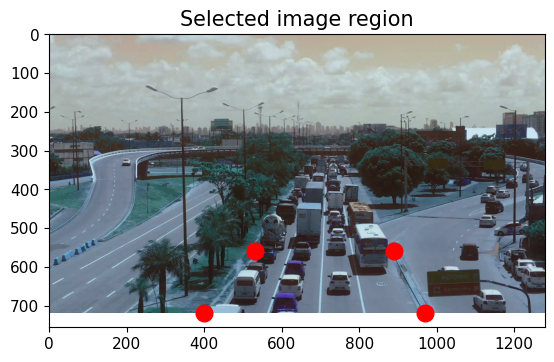

In [10]:
transformer_cam1

In [6]:
transformer_cam1.counter

6

In [ ]:
# save it as a gif
from moviepy.editor import ImageSequenceClip
clip = ImageSequenceClip(list(output_frames), fps=12)
clip.write_gif('bird_view.gif', fps=12)

---